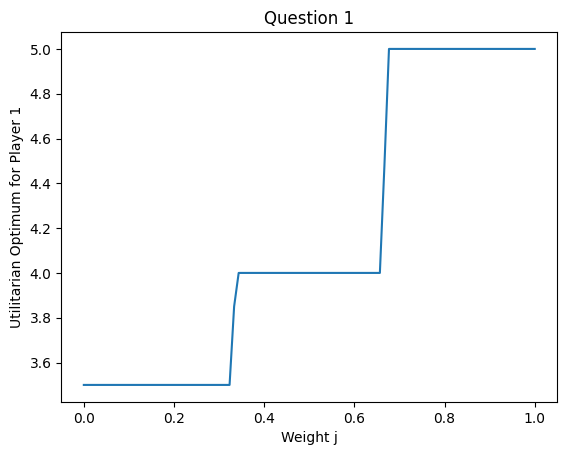

In [4]:
import matplotlib.pyplot as plt
import cvxpy as cvx
import numpy as np

# Defining the Array D as given in the question
d = np.array([3.5, 2])

# Create an array of 100 equally spaced values between 0 and 1
j = np.linspace(0, 1, 100) 
# Initialize an empty list to store the optimal value of u1 for each value of j
u1_values = [] 

#Setting u1 and u2 as cvxpy variables
u1 = cvx.Variable()
u2 = cvx.Variable()

# Define the constraints of the optimization problem
a = u1 + (2 * u2) - 12 
b = (2 * u1) + u2 - 12 

# Define F as a list of constraints, including a and b as non-positive constraints, 
# and u1 and u2 as greater than or equal to their respective minimum values in the array d
F = [cvx.constraints.NonPos(a), cvx.constraints.NonPos(b), u1 >= d[0], u2 >= d[1]]


# Loop over each value of j, solve the optimization problem, and store the optimal value of u1 in the list u1_values
for i in j:
# Define the objective function to maximize the weighted sum of u1 and u2, with the weight defined by the value of j
    objective = cvx.Maximize(i * u1 + (1 - i) * u2) 
# Define the optimization problem as a cvxpy problem, with the objective function and constraints
    prob = cvx.Problem(objective, F) 
# Solve the optimization problem
    result = prob.solve() 
# Store the optimal value of u1 in the list u1_values
    u1_values.append(u1.value) 

# Plot the optimal value of u1 as a function of j
plt.plot(j, u1_values)
plt.xlabel('Weight j')
plt.ylabel('Utilitarian Optimum for Player 1')
plt.title('Question 1')
plt.show()